In [1]:
cd /tf/astromer

/tf/astromer


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd
import json
import os 


from core.classifier import predict_from_path
from core.data  import clf_records
from sklearn.metrics import confusion_matrix
from core.plots import plot_cm

%load_ext autoreload
%autoreload 2

In [3]:
data_path = './data/records/alcock/'

In [4]:
rnn_att = './runs/classification/rnn_att'
rnn_att_leak = './runs/classification/rnn_att_leak'

In [5]:
test_batches = clf_records(os.path.join(data_path, 'test'),
                            256,
                            max_obs=200)

In [6]:
# rnn + attention + leak == ral
ral_results = predict_from_path(rnn_att_leak, test_batches, use_att=True, use_fc=False)
# rnn + attention == ral
ra_results = predict_from_path(rnn_att, test_batches, use_att=True, use_fc=False)

test: 0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:591: UserWarning: Input dict contained keys ['lcid', 'label', 'obserr', 'mask_out'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
test: 21it [00:39,  1.89s/it]
test: 0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:591: UserWarning: Input dict contained keys ['lcid', 'label', 'obserr', 'mask_out'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
test: 21it [00:40,  1.91s/it]


In [7]:
print('MODEL -   F1   - PREC - RECA - ACC')
for rdic, name in zip([ral_results, ra_results], ['RNN+LEAK', 'RNN']):
    print('{}:   {:.2f} - {:.2f} - {:.2f} - {:.2f}'.format(name, rdic['f1'], rdic['precision'],
                                                     rdic['recall'], rdic['accuracy']))

MODEL -   F1   - PREC - RECA - ACC
RNN+LEAK:   0.78 - 0.78 - 0.79 - 0.83
RNN:   0.79 - 0.79 - 0.79 - 0.83


In [8]:
cls_names = pd.read_csv(os.path.join(data_path, 'objects.csv'))['label'].values
cls_names

array(['Cep_0', 'Cep_1', 'EC', 'LPV', 'RRab', 'RRc'], dtype=object)

In [9]:
ral_cm = confusion_matrix(ral_results['y_true'], ral_results['y_pred'], normalize='true')
ra_cm = confusion_matrix(ra_results['y_true'], ra_results['y_pred'], normalize='true')

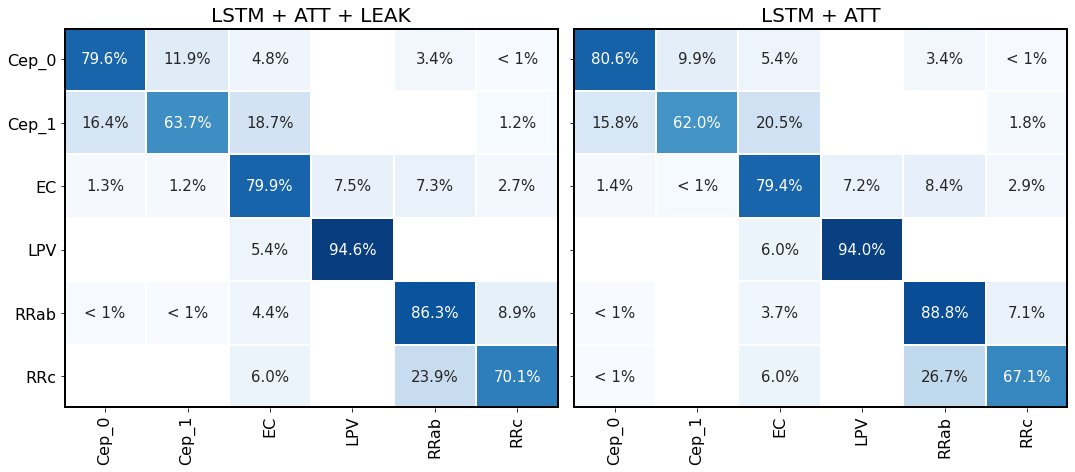

In [13]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True, gridspec_kw={'hspace': 0., 'wspace': 0.03})

axes[0] = plot_cm(ral_cm, axes[0], title='LSTM + ATT + LEAK', class_names=cls_names)
axes[1] = plot_cm(ra_cm, axes[1], title='LSTM + ATT', class_names=cls_names)